In [22]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
%matplotlib inline

In [23]:
for_sale_path = "For_Sale_Inventory.csv"
median_list_path = "Median_List_Price.csv"
median_sale_path = "Median_Sale_Price.csv"

for_sale_inventory_df = pd.read_csv(for_sale_path)
median_list_path_df = pd.read_csv(median_list_path)
median_sale_path_df = pd.read_csv(median_sale_path)

In [24]:
# Housing Inventory: How has the housing inventory fluctuated since pre-pandemic times?

In [25]:
# Create a DataFrame that focuses on our five cities/states 
complete_housing_inventory = for_sale_inventory_df.iloc[[1,2,3,29,58]]
complete_housing_inventory

RegionID  SizeRank       RegionName RegionType StateName  2018-03-31  \
1     394913         1     New York, NY        msa        NY  73707.0000   
2     753899         2  Los Angeles, CA        msa        CA  21998.0000   
3     394463         3      Chicago, IL        msa        IL  38581.0000   
29    394355        29       Austin, TX        msa        TX   7392.0000   
58    394938        59        Omaha, NE        msa        NE   3001.0000   

    2018-04-30  2018-05-31  2018-06-30  2018-07-31  ...  2022-09-30  \
1   80345.0000  85864.0000  90067.0000  91881.0000  ...  60262.0000   
2   23784.0000  25605.0000  27109.0000  28811.0000  ...  22400.0000   
3   42253.0000  45757.0000  47492.0000  48984.0000  ...  31682.0000   
29   8277.0000   9243.0000   9920.0000  10287.0000  ...  12616.0000   
58   3167.0000   3419.0000   3638.0000   3834.0000  ...   2242.0000   

    2022-10-31  2022-11-30  2022-12-31  2023-01-31  2023-02-28  2023-03-31  \
1   58241.0000  55450.0000  50400.0000  45916.0000  42796.0000  43253.0000   
2   21802.0000  20477.0000  18604.0000  16767.0000  15382.0000  15214.0000   
3   30798.0000  28771.0000  25674.0000  22770.0000  20829.0000  20922.0000   
29  12433.0000  11764.0000  10703.0000   9743.0000   9093.0000   9350.0000   
58   2146.0000   1980.0000   1752.0000   1543.0000   1386.0000   1446.0000   

    2023-04-30  2023-05-31  2023-06-30  
1   44197.0000  45829.0000  46180.0000  
2   15103.0000  15283.0000  15364.0000  
3   21214.0000  22091.0000  22700.0000  
29  10007.0000  11016.0000  11759.0000  
58   1567.0000   1748.0000   1889.0000  

[5 rows x 69 columns]

In [26]:
housing_dates = pd.to_datetime(pd.Series(complete_housing_inventory.columns[5:]), format="%Y-%m-%d").dt.strftime("%m-%Y")
housing_dates

0     03-2018
1     04-2018
2     05-2018
3     06-2018
4     07-2018
5     08-2018
6     09-2018
7     10-2018
8     11-2018
9     12-2018
10    01-2019
11    02-2019
12    03-2019
13    04-2019
14    05-2019
15    06-2019
16    07-2019
17    08-2019
18    09-2019
19    10-2019
20    11-2019
21    12-2019
22    01-2020
23    02-2020
24    03-2020
25    04-2020
26    05-2020
27    06-2020
28    07-2020
29    08-2020
30    09-2020
31    10-2020
32    11-2020
33    12-2020
34    01-2021
35    02-2021
36    03-2021
37    04-2021
38    05-2021
39    06-2021
40    07-2021
41    08-2021
42    09-2021
43    10-2021
44    11-2021
45    12-2021
46    01-2022
47    02-2022
48    03-2022
49    04-2022
50    05-2022
51    06-2022
52    07-2022
53    08-2022
54    09-2022
55    10-2022
56    11-2022
57    12-2022
58    01-2023
59    02-2023
60    03-2023
61    04-2023
62    05-2023
63    06-2023
dtype: object

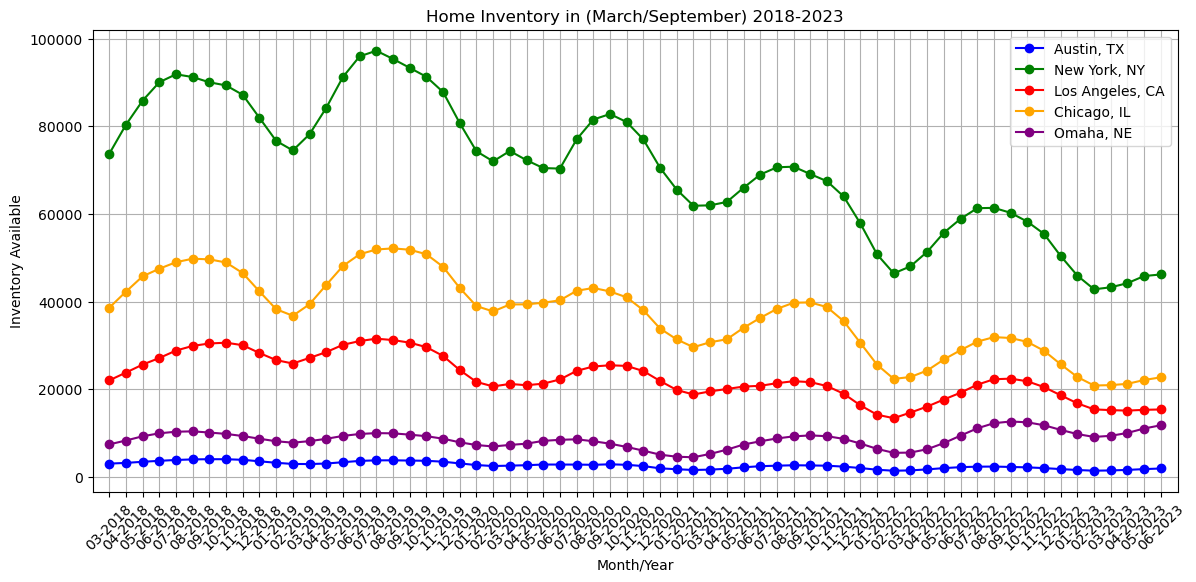

In [27]:
# Make a DataFrame using the loc function to find specific cities 
inventory_comparison = complete_housing_inventory.loc[(complete_housing_inventory["RegionName"] == "Austin, TX") |
                                             (complete_housing_inventory["RegionName"] == "Omaha, NE") |
                                             (complete_housing_inventory["RegionName"] == "Chicago, IL") |
                                             (complete_housing_inventory["RegionName"] == "New York, NY") |
                                             (complete_housing_inventory["RegionName"] == "Los Angeles, CA")
                                            ]

# Reset index to match the city and state we are analyzing 
inventory_comparison = inventory_comparison.set_index("RegionName")

# Find the row where each city is located 
complete_housing_inventory.loc[complete_housing_inventory["RegionName"] == "Omaha, NE"]
complete_housing_inventory.loc[complete_housing_inventory["RegionName"] == "New York, NY"]
complete_housing_inventory.loc[complete_housing_inventory["RegionName"] == "Chicago, IL"]
complete_housing_inventory.loc[complete_housing_inventory["RegionName"] == "Los Angeles, CA"]
complete_housing_inventory.loc[complete_housing_inventory["RegionName"] == "Austin, TX"]

# Find the inventory over the five-year period for each city 
ny_ny_inventory = complete_housing_inventory.iloc[0,5:].to_list()
om_ne_inventory = complete_housing_inventory.iloc[3,5:].to_list()
ch_il_inventory = complete_housing_inventory.iloc[2,5:].to_list()
los_ca_inventory = complete_housing_inventory.iloc[1,5:].to_list()
au_tx_inventory = complete_housing_inventory.iloc[4,5:].to_list()

# Create a DataFrame that displays the housing inventory over a 5-year period for the five cities in the US
df = pd.DataFrame({
    "Austin, TX": au_tx_inventory,
    "New York, NY": ny_ny_inventory,
    "Los Angeles, CA": los_ca_inventory,
    "Chicago, IL": ch_il_inventory,
    "Omaha, NE": om_ne_inventory
}, index=housing_dates)

# Transpose the DataFrame to make dates as rows
df_transposed = df.T
df_transposed

plt.figure(figsize=(14, 6))  # Adjust the figure size if needed

# Specify colors for each city (consistent with the order of cities in df)
colors = ['blue', 'green', 'red', 'orange', 'purple']

# Loop through the columns of df and plot each city's inventory data with specified colors
for idx, city in enumerate(df.columns):
    plt.plot(housing_dates, df[city], marker='o', color=colors[idx], label=city)
     
# Set a Title and labels
plt.title("Home Inventory in (March/September) 2018-2023")
plt.xlabel("Month/Year")
plt.ylabel("Inventory Available")
plt.xlim(-1,64)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(df)

# Save our graph and show the graph
#plt.tight_layout()
plt.savefig("Pandemic-Home-Inventory.png")
plt.show()

In [28]:
def calculate_rate_of_increase(prices):
    return (prices.iloc[-1] - prices.iloc[0]) / prices.iloc[0] * 100

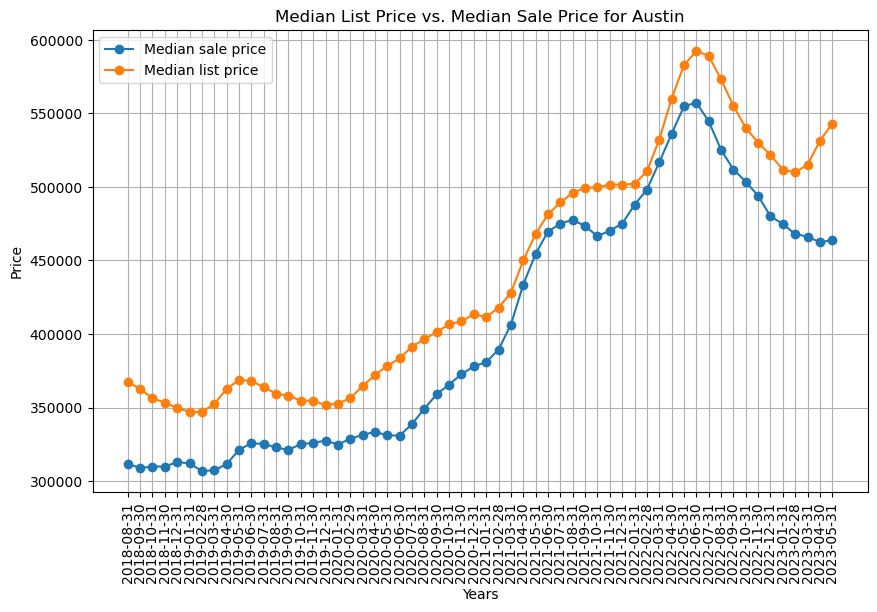

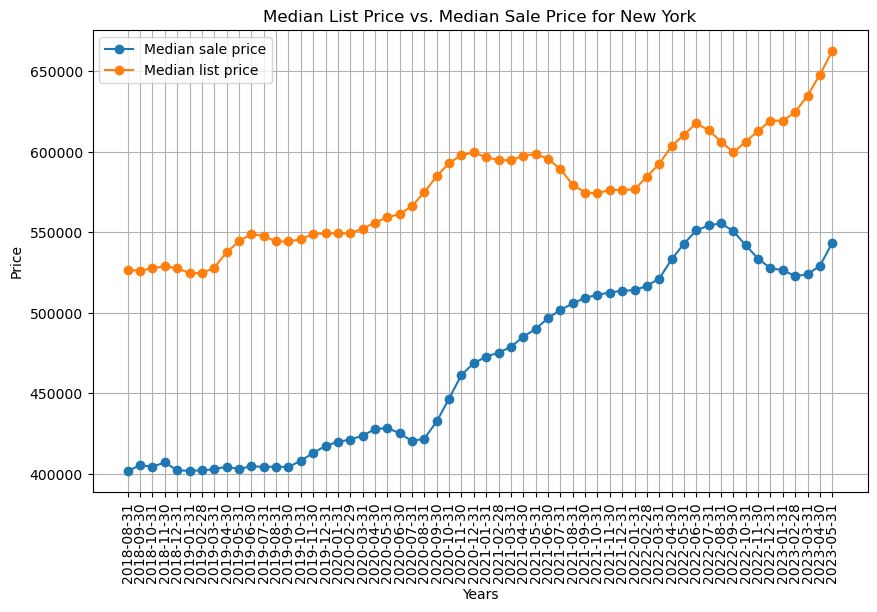

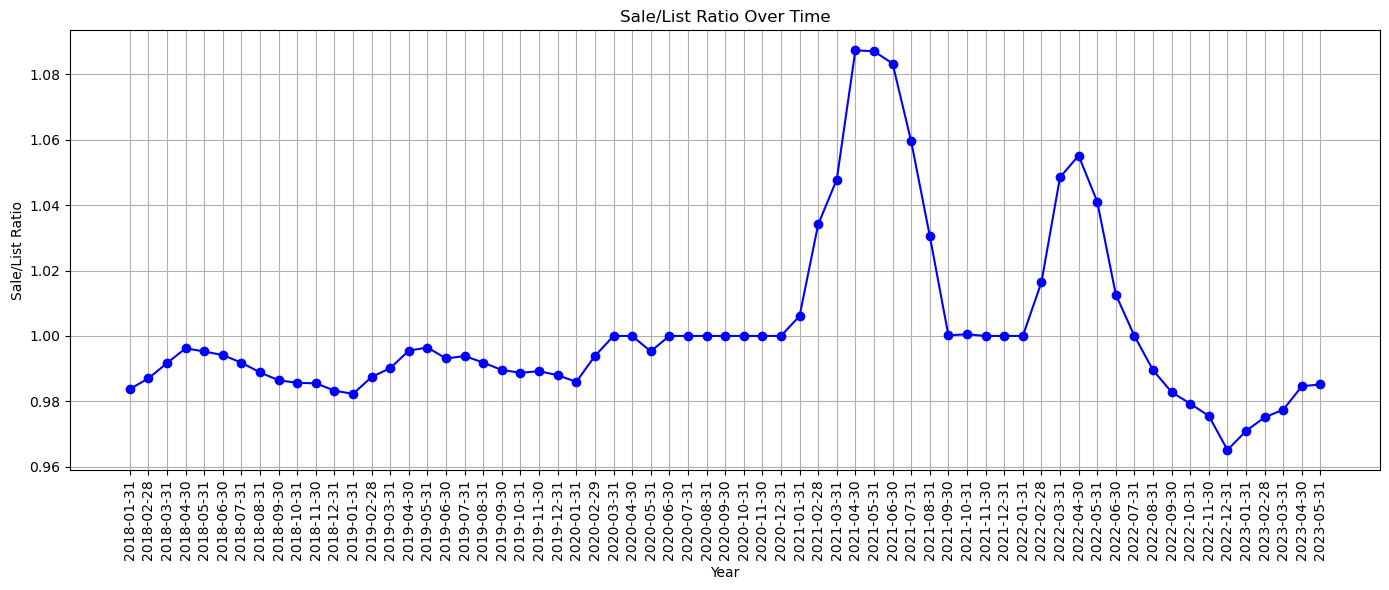

In [29]:
# Median Sale Price vs Median list price in Austin
median_list_path_df = pd.read_csv(median_list_path)
median_sale_path_df = pd.read_csv(median_sale_path)

# Assuming both DataFrames have the same RegionName or RegionID (common identifier)
region_name = "RegionName"

# Extract data for a specific region (e.g., "New York") - replace "New York" with the desired region
region_data_list_aus = median_list_path_df[median_list_path_df[region_name] == "Austin, TX"]
region_data_sale_aus = median_sale_path_df[median_sale_path_df[region_name] == "Austin, TX"]
clean= region_data_list_aus.drop(columns=["RegionID","SizeRank","RegionName","RegionType", "StateName"])
clean1=region_data_sale_aus.drop(columns=["RegionID","SizeRank","RegionName","RegionType", "StateName"])
clean_transposed=clean.T
clean1_transposed=clean1.T
clean_transposed.reset_index(inplace=True)
clean1_transposed.reset_index(inplace=True)
clean_transposed.columns = ["date", "median_list_price"]
clean1_transposed.columns = ["date", "median_sale_price"]
clean_data= pd.merge(clean1_transposed, clean_transposed, on="date", how="inner")
clean_data

# Plot the double line graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(clean_data["date"], clean_data["median_sale_price"], label= "Median sale price", marker='o')
plt.plot(clean_data["date"], clean_data["median_list_price"], label= "Median list price", marker='o')

# Add labels, title, and legend
plt.xlabel("Years")
plt.ylabel("Price")
plt.title("Median List Price vs. Median Sale Price for Austin")
plt.legend()
plt.xticks(rotation=90)

# Show the plot
plt.grid(True)  # Add grid lines
plt.show()

# Median Sale Price vs Median list price in New York
median_list_path_df = pd.read_csv(median_list_path)
median_sale_path_df = pd.read_csv(median_sale_path)

# Assuming both DataFrames have the same RegionName or RegionID (common identifier)
region_name = "RegionName"

# Extract data for a specific region (e.g., "New York") - replace "New York" with the desired region
region_data_list_ny = median_list_path_df[median_list_path_df[region_name] == "New York, NY"]
region_data_sale_ny = median_sale_path_df[median_sale_path_df[region_name] == "New York, NY"]
clean_ny = region_data_list_ny.drop(columns=["RegionID","SizeRank","RegionName","RegionType", "StateName"])
clean1_ny=region_data_sale_ny.drop(columns=["RegionID","SizeRank","RegionName","RegionType", "StateName"])
clean_ny_transposed=clean_ny.T
clean1_ny_transposed=clean1_ny.T
clean_ny_transposed.reset_index(inplace=True)
clean1_ny_transposed.reset_index(inplace=True)
clean_ny_transposed.columns = ["date", "median_list_price"]
clean1_ny_transposed.columns = ["date", "median_sale_price"]
clean_ny_data= pd.merge(clean1_ny_transposed, clean_ny_transposed, on="date", how="inner")
clean_ny_data

# Plot the double line graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(clean_ny_data["date"], clean_ny_data["median_sale_price"], label= "Median sale price", marker='o')
plt.plot(clean_ny_data["date"], clean_ny_data["median_list_price"], label= "Median list price", marker='o')

# Add labels, title, and legend
plt.xlabel("Years")
plt.ylabel("Price")
plt.title("Median List Price vs. Median Sale Price for New York")
plt.legend()
plt.xticks(rotation=90)

# Show the plot
plt.grid(True)  # Add grid lines
plt.show()

#using list to sale ratio
median_sale_to_list_path = "Median_Sale_to_list.csv"
median_sale_path = "median_sale_price.csv"

#for_sale_inventory_df = pd.read_csv(for_sale_path)
median_sale_to_list_df = pd.read_csv(median_sale_to_list_path)
median_sale_path_df = pd.read_csv(median_sale_path)
median_sale_to_list_austin=median_sale_to_list_df[median_sale_to_list_df["RegionName"]=="Austin, TX"]
clean_ratio= median_sale_to_list_austin.drop(columns=["RegionID","SizeRank","RegionName","RegionType", "StateName"])

# Transpose the DataFrame to make dates as rows
clean_transposed_ratio = clean_ratio.T

# Reset the index to move the dates from the column names to a proper "date" column
clean_transposed_ratio.reset_index(inplace=True)

# Rename the columns for better readability
clean_transposed_ratio.columns = ["date", "sale_list_ratio"]

#clean_transposed["year"]= pd.to_datetime(clean_transposed["date"]).dt.year
#clean_transposed["month"]= pd.to_datetime(clean_transposed["date"]).dt.month
plt.figure(figsize=(14, 6))  # Adjust the figure size if needed

#plt.plot(clean_transposed["year"], clean_transposed["sale_list_ratio"], marker='o', color='b')
plt.plot(clean_transposed_ratio["date"], clean_transposed_ratio["sale_list_ratio"], marker='o', color='b')
plt.xlabel("Year")
plt.ylabel("Sale/List Ratio")
plt.title("Sale/List Ratio Over Time")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

In [30]:
# Median List Prices
median_list_path_df = median_list_path_df.rename(columns={"2018-03-31":"March 2018",
                                                              "2019-03-31":"March 2019",
                                                              "2020-03-31":"March 2020",
                                                              "2021-03-31":"March 2021",
                                                              "2022-03-31":"March 2022",
                                                              "2023-03-31":"March 2023"})
median_list_prices = median_list_path_df[["RegionName",
                                           "March 2018","March 2019","March 2020","March 2021",
                                           "March 2022","March 2023"]].copy()
median_list_prices

RegionName   March 2018   March 2019   March 2020  \
0                 United States  263267.0000  281300.0000  289600.0000   
1                  New York, NY  503000.0000  528000.0000  552333.0000   
2               Los Angeles, CA  721333.0000  716267.0000  779965.0000   
3                   Chicago, IL  284600.0000  291267.0000  291633.0000   
4                    Dallas, TX  322997.0000  316967.0000  315267.0000   
5                   Houston, TX  294467.0000  292665.0000  287666.0000   
6                Washington, DC  405633.0000  415667.0000  443300.0000   
7              Philadelphia, PA  225500.0000  239000.0000  261600.0000   
8                     Miami, FL  366600.0000  361667.0000  374367.0000   
9                   Atlanta, GA  280600.0000  283733.0000  294333.0000   
10                   Boston, MA  502933.0000  506666.0000  546300.0000   
11                  Phoenix, AZ  320833.0000  325167.0000  351629.0000   
12            San Francisco, CA  864333.0000  884633.0000  936333.0000   
13                Riverside, CA  377967.0000  389967.0000  400646.0000   
14                  Detroit, MI  183233.0000  193267.0000  194667.0000   
15                  Seattle, WA  478317.0000  526333.0000  552633.0000   
16              Minneapolis, MN  314933.0000  324933.0000  326600.0000   
17                San Diego, CA  653147.0000  652633.0000  681600.0000   
18                    Tampa, FL  243933.0000  247967.0000  260900.0000   
19                   Denver, CO  463988.0000  459967.0000  479375.0000   
20                Baltimore, MD  269667.0000  283133.0000  294850.0000   
21                St. Louis, MO  185967.0000  203333.0000  215421.0000   
22                  Orlando, FL  275450.0000  283666.0000  296233.0000   
23                Charlotte, NC  297667.0000  296633.0000  302333.0000   
24              San Antonio, TX  256667.0000  261530.0000  269767.0000   
25                 Portland, OR  438333.0000  444900.0000  445967.0000   
26               Sacramento, CA  434667.0000  448263.0000  473300.0000   
27               Pittsburgh, PA  166300.0000  169217.0000  182967.0000   
28               Cincinnati, OH  199233.0000  222567.0000  225200.0000   
29                   Austin, TX  362567.0000  352381.0000  364633.0000   
30                Las Vegas, NV  287928.0000  300000.0000  317646.0000   
31              Kansas City, MO  238467.0000  269933.0000  276600.0000   
32                 Columbus, OH  233267.0000  247533.0000  246600.0000   
33             Indianapolis, IN  203075.0000  222617.0000  224667.0000   
34                Cleveland, OH  159967.0000  174933.0000  176600.0000   
35                 San Jose, CA 1122633.0000 1101551.0000 1147315.0000   
36                Nashville, TN  327633.0000  321209.0000  327000.0000   
37           Virginia Beach, VA  247833.0000  262967.0000  272163.0000   
38               Providence, RI  303017.0000  326817.0000  340967.0000   
39             Jacksonville, FL  274867.0000  274267.0000  285433.0000   
40                Milwaukee, WI  227967.0000  261600.0000  254633.0000   
41            Oklahoma City, OK  215597.0000  228300.0000  244915.0000   
42                  Raleigh, NC  320633.0000  316933.0000  331167.0000   
43                  Memphis, TN  179783.0000  200442.0000  221300.0000   
44                 Richmond, VA  260963.0000  275497.0000  289949.0000   
45               Louisville, KY  221001.0000  235773.0000  228275.0000   
46              New Orleans, LA  232833.0000  243600.0000  247633.0000   
47           Salt Lake City, UT  361050.0000  378267.0000  401510.0000   
48                 Hartford, CT  255233.0000  259970.0000  262767.0000   
49                  Buffalo, NY  164933.0000  169433.0000  171933.0000   
50               Birmingham, AL  206283.0000  229600.0000  248267.0000   
51                Rochester, NY  164792.0000  176567.0000  183800.0000   
52             Grand Rapids, MI  237533.0000  239833.0000  241300.0000   
53                   Tucs

In [31]:
# Make a DataFrame using the loc function to find specific cities 
homes_list_comparison = median_list_prices.loc[(median_list_prices["RegionName"] == "Austin, TX") |
                                               (median_list_prices["RegionName"] == "Omaha, NE") |
                                               (median_list_prices["RegionName"] == "Chicago, IL") |
                                               (median_list_prices["RegionName"] == "New York, NY") |
                                               (median_list_prices["RegionName"] == "Los Angeles, CA")
                                               ]

homes_list_comparison


RegionName  March 2018  March 2019  March 2020  March 2021  \
1      New York, NY 503000.0000 528000.0000 552333.0000 594667.0000   
2   Los Angeles, CA 721333.0000 716267.0000 779965.0000 849629.0000   
3       Chicago, IL 284600.0000 291267.0000 291633.0000 304933.0000   
29       Austin, TX 362567.0000 352381.0000 364633.0000 427999.0000   
58        Omaha, NE 241133.0000 255685.0000 236300.0000 219000.0000   

    March 2022  March 2023  
1  592550.0000 634967.0000  
2  888263.0000 892967.0000  
3  297667.0000 308833.0000  
29 532133.0000 514967.0000  
58 239650.0000 277333.0000

In [32]:
df_T=homes_list_comparison.T.reset_index()
df_T = pd.DataFrame(df_T.values[1:], columns=df_T. iloc[0]).set_index("RegionName")
df_T

0          New York, NY Los Angeles, CA Chicago, IL  Austin, TX   Omaha, NE
RegionName                                                                 
March 2018  503000.0000     721333.0000 284600.0000 362567.0000 241133.0000
March 2019  528000.0000     716267.0000 291267.0000 352381.0000 255685.0000
March 2020  552333.0000     779965.0000 291633.0000 364633.0000 236300.0000
March 2021  594667.0000     849629.0000 304933.0000 427999.0000 219000.0000
March 2022  592550.0000     888263.0000 297667.0000 532133.0000 239650.0000
March 2023  634967.0000     892967.0000 308833.0000 514967.0000 277333.0000

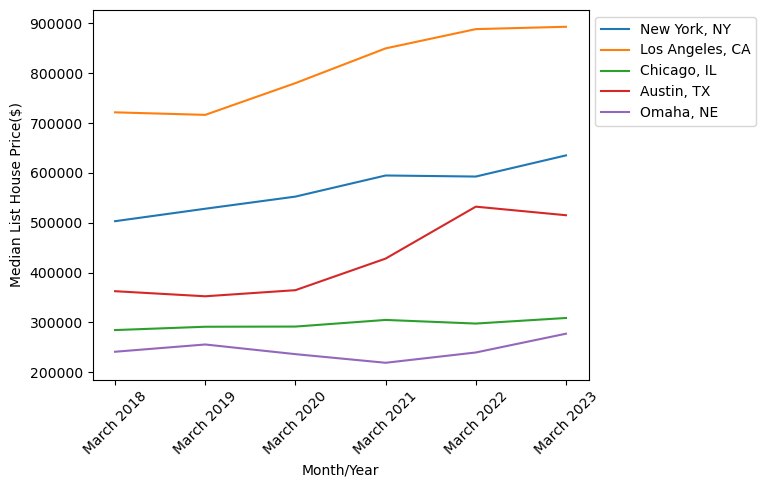

In [33]:
# Plot the graph and customize 
#plt.figure(figsize =(20, 10))
df_T.plot()
plt.xlabel("Month/Year")
plt.ylabel("Median List House Price($)")
plt.xticks(rotation =45)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig("Median_House_List_Prices.png")
plt.show()

In [34]:
region_df = median_sale_path_df.rename(columns={"2018-08-31":"August 2018",
                                                              "2019-08-31":"August 2019",
                                                              "2020-08-31":"August 2020",
                                                              "2021-08-31":"August 2021",
                                                              "2022-08-31":"August 2022",
                                                              "2023-05-31":"May 2023"})
housing_sale_prices = region_df[["RegionID","RegionName","RegionType","StateName",
                                           "August 2018","August 2019","August 2020","August 2021",
                                           "August 2022","May 2023"]].copy()
housing_sale_prices.head()  

RegionID       RegionName RegionType StateName  August 2018  August 2019  \
0    102001    United States    country       NaN  234380.0000  246235.0000   
1    394913     New York, NY        msa        NY  401764.0000  404490.0000   
2    753899  Los Angeles, CA        msa        CA  631151.0000  636499.0000   
3    394463      Chicago, IL        msa        IL  222210.0000  227639.0000   
4    394514       Dallas, TX        msa        TX  259839.0000  265462.0000   

   August 2020  August 2021  August 2022    May 2023  
0  264691.0000  314742.0000  345711.0000 346360.0000  
1  421916.0000  505905.0000  555641.0000 543442.0000  
2  685362.0000  809457.0000  871228.0000 844579.0000  
3  244615.0000  272749.0000  293035.0000 297489.0000  
4  284716.0000  346007.0000  403328.0000 379086.0000

In [35]:
#Create a variable for each city we are analyzing for this project
homes_in_austin_tx = median_sale_path_df.loc[median_sale_path_df["RegionName"] == "Austin, TX"]
homes_in_omaha_ne = median_sale_path_df.loc[median_sale_path_df["RegionName"] == "Omaha, NE"]
homes_in_chicago_il = median_sale_path_df.loc[median_sale_path_df["RegionName"] == "Chicago, IL"]
homes_in_ny_ny = median_sale_path_df.loc[median_sale_path_df["RegionName"] == "New York, NY"]
homes_in_la_ca = median_sale_path_df.loc[median_sale_path_df["RegionName"] == "Los Angeles, CA"]

In [36]:
#Make a DataFrame using the loc function to find specific cities
sale_price_comparison = housing_sale_prices.loc[(housing_sale_prices["RegionName"] == "Austin, TX") |
                                                 (housing_sale_prices["RegionName"] == "Omaha, NE") |
                                                (housing_sale_prices["RegionName"] == "Chicago, IL") |
                                                (housing_sale_prices["RegionName"] == "New York, NY") |
                                                (housing_sale_prices["RegionName"] == "Los Angeles, CA") 
                                               ]

RegionID       RegionName RegionType StateName  August 2018  August 2019  \
0    102001    United States    country       NaN  234380.0000  246235.0000   
1    394913     New York, NY        msa        NY  401764.0000  404490.0000   
2    753899  Los Angeles, CA        msa        CA  631151.0000  636499.0000   
3    394463      Chicago, IL        msa        IL  222210.0000  227639.0000   
4    394514       Dallas, TX        msa        TX  259839.0000  265462.0000   

   August 2020  August 2021  August 2022    May 2023  
0  264691.0000  314742.0000  345711.0000 346360.0000  
1  421916.0000  505905.0000  555641.0000 543442.0000  
2  685362.0000  809457.0000  871228.0000 844579.0000  
3  244615.0000  272749.0000  293035.0000 297489.0000  
4  284716.0000  346007.0000  403328.0000 379086.0000

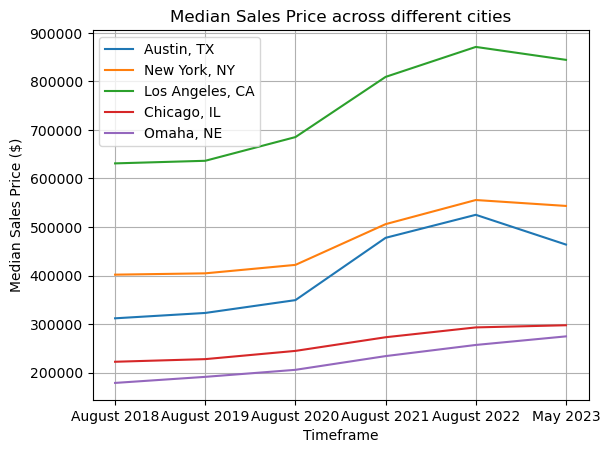

In [37]:
# Reset index to match the city and state we are analyzing 
sale_price_comparison.set_index("RegionName")

# Find the row where each city is located 
housing_sale_prices.loc[housing_sale_prices["RegionName"] == "Omaha, NE"]
housing_sale_prices.loc[housing_sale_prices["RegionName"] == "New York, NY"]
housing_sale_prices.loc[housing_sale_prices["RegionName"] == "Chicago, IL"]
housing_sale_prices.loc[housing_sale_prices["RegionName"] == "Los Angeles, CA"]
housing_sale_prices.loc[housing_sale_prices["RegionName"] == "Austin, TX"]

# Find the Sales prices over the five-year period for each city 
ny_ny_sale_prices = housing_sale_prices.iloc[1,4:].to_list()
om_ne_sale_prices = housing_sale_prices.iloc[58,4:].to_list()
ch_il_sale_prices = housing_sale_prices.iloc[3,4:].to_list()
los_ca_sale_prices = housing_sale_prices.iloc[2,4:].to_list()
au_tx_sale_prices = housing_sale_prices.iloc[29,4:].to_list()

# Create a DataFrame that displays the sales prices over a 5-year period for the five cities in the US
df = pd.DataFrame({
   "Austin, TX": au_tx_sale_prices,
    "New York, NY": ny_ny_sale_prices,
    "Los Angeles, CA": los_ca_sale_prices,
    "Chicago, IL": ch_il_sale_prices,
    "Omaha, NE": om_ne_sale_prices
}, index = ["August 2018","August 2019","August 2020","August 2021","August 2022","May 2023"])

line = df.plot.line()
plt.ylabel('Median Sales Price ($)')
plt.xlabel('Timeframe')
plt.title('Median Sales Price across different cities')
plt.grid(True)
housing_sale_prices.head()

Text(0.5, 1.0, 'Median Sales Price across different cities')

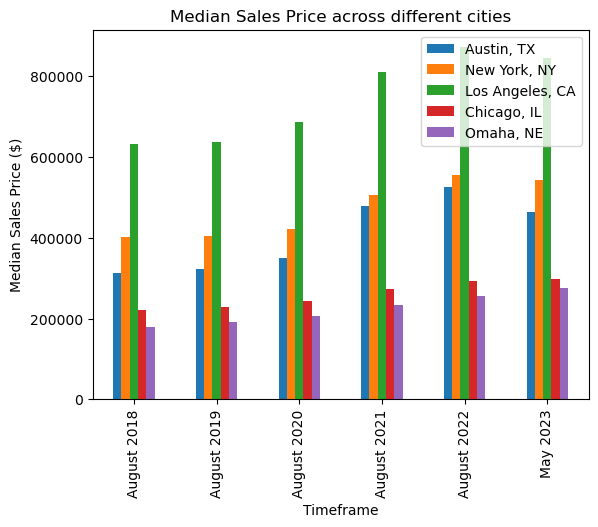

In [38]:
bar = df.plot.bar()
plt.ylabel('Median Sales Price ($)')
plt.xlabel('Timeframe')
plt.title('Median Sales Price across different cities')

In [39]:
median_sale_path = "Median_List_Price.csv"

median_sale_path_df = pd.read_csv(median_sale_path)

In [40]:
#Keep 2023 median sales prices
median_sale_path_2023_df = median_sale_path_df[["RegionName","RegionType","StateName","2023-01-31", "2023-02-28", "2023-03-31", "2023-04-30", "2023-05-31", "2023-06-30"]]

#Create 2023 average median price
median_sale_path_2023_df["2023 Average Median Sales Price"]=median_sale_path_2023_df.mean(axis="columns")
pd.options.display.float_format = "{:.4f}".format

# Sort the DataFrame by the ‘2023 Average Median Sales Price’ column in ascending order (lowest to greatest)
median_sale_path_2023_df = median_sale_path_2023_df.sort_values(by="2023 Average Median Sales Price")

#Print median sale prices dataframe
pd.set_option("display.max_rows", None)
median_sale_path_2023_df.head()

C:\Users\14029\AppData\Local\Temp\ipykernel_29156\1900532818.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_sale_path_2023_df["2023 Average Median Sales Price"]=median_sale_path_2023_df.mean(axis="columns")
C:\Users\14029\AppData\Local\Temp\ipykernel_29156\1900532818.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  median_sale_path_2023_df["2023 Average Median Sales Price"]=median_sale_path_2023_df.mean(axis="columns")


RegionName RegionType StateName  2023-01-31  2023-02-28  2023-03-31  \
696  Clewiston, FL        msa        FL  51333.0000  52167.0000  52167.0000   
829     Macomb, IL        msa        IL  74583.0000  73767.0000  72433.0000   
699      Selma, AL        msa        AL  83833.0000  88833.0000  86167.0000   
318  Johnstown, PA        msa        PA  95800.0000  89100.0000  91350.0000   
489     Marion, IN        msa        IN 101267.0000  91567.0000  83267.0000   

     2023-04-30  2023-05-31  2023-06-30  2023 Average Median Sales Price  
696  56667.0000  58300.0000  61633.0000                       55377.8333  
829  72433.0000  74767.0000  80450.0000                       74738.8333  
699  87583.0000  82000.0000  85500.0000                       85652.6667  
318  93017.0000  93017.0000  92900.0000                       92530.6667  
489  89600.0000  98467.0000 108133.0000                       95383.5000

In [41]:
#Create bar graph of average median sale prices and cities
cities = median_sale_path_2023_df["RegionName"]
median_prices = median_sale_path_2023_df["2023 Average Median Sales Price"]
plt.figure(figsize=(300, 30))
plt.bar(cities, median_prices, color="skyblue")
plt.xlabel("Cities")
plt.ylabel("Median Sales Prices")
plt.title("Median Sales Prices by City in 2023")
                                         
# Rotate the x-axis labels if there are many cities to make them readable
plt.xticks(fontsize=30,rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [47]:
# Access the specific column
column_name = "2023 Average Median Sales Price"
column_data = median_sale_path_2023_df["2023 Average Median Sales Price"]

# Calculate the median
median_value = column_data.median()
print(f"2023 Median Sales Price: ${median_value}")

2023 Median Sales Price: $254714.0
